# Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import scipy.stats as stats
sns.set(style="darkgrid")

%matplotlib inline

# Data

In [17]:
# Reading in the dataset
listings = pd.read_csv('listings.csv')

In [18]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,315,2020-03-14,4.68,1,233
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


In [19]:
# Checking for Null Values
total = listings.isnull().sum().sort_values(ascending=False)
total

reviews_per_month                 10704
last_review                       10703
name                                 17
host_name                             8
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

### Figure 1

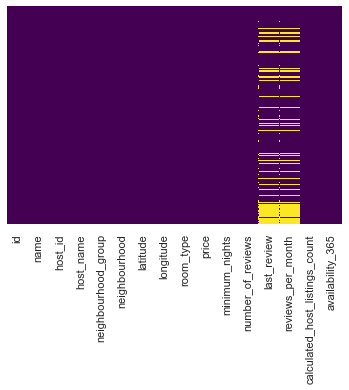

In [20]:
sns.heatmap(listings.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

    The yellow ticks visually represent the null values for the repective variables.

In [21]:
# Removing columns not needed for EDA
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [22]:
cols_to_drop = ['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude',
               'last_review']

In [23]:
listings.drop(cols_to_drop, axis = 1, inplace = True)

In [24]:
# New dataframe head
listings.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Washington Heights,Private room,100,1,1,0.01,1,365
1,Manhattan,Midtown,Entire home/apt,225,3,48,0.38,2,365
2,Brooklyn,Clinton Hill,Entire home/apt,89,1,315,4.68,1,233
3,Manhattan,Murray Hill,Entire home/apt,200,3,78,0.58,1,0
4,Brooklyn,Bedford-Stuyvesant,Private room,60,29,50,0.38,1,365


# Exploratory Analysis

### Summary Table

In [25]:
# Numerical Summary Table
listings.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50378.000000,50378.000000,50378.000000,39674.000000,50378.000000,50378.000000
mean,164.437453,7.760411,24.765116,1.184133,8.427210,124.629759
std,449.524005,21.595536,48.853847,1.519787,36.377227,138.998068
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,105.000000,3.000000,5.000000,0.580000,1.000000,75.000000
75%,175.000000,5.000000,24.000000,1.720000,2.000000,255.000000
max,25000.000000,1250.000000,746.000000,63.040000,307.000000,365.000000


### Figures 2a, 2b

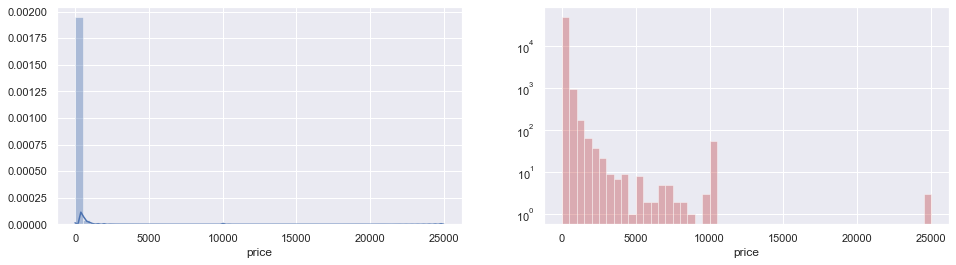

In [26]:
# Distribution of price
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.distplot(listings['price'], color = 'b', norm_hist = False)

plt.subplot(1, 2, 2)
sns.distplot(listings['price'], color = 'r', hist_kws={'log':True}, kde = False, norm_hist = False)

Figure 2b - RIGHT PLOT:

    Using a log transform, we can view the price distribution clearly.
    
    Mean Value = USD 164
    Median Value = USD 105
    Mode Value = USD 100
    Skewness = Right Skew
    Outliers = Present

### Figure 3a

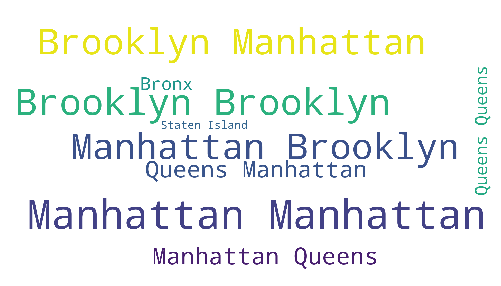

In [27]:
# Word Cloud
plt.subplots(figsize=(10,5))

wordcloud = WordCloud(background_color='white', width=1900, height=1060).generate(" ".join(listings['neighbourhood_group']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

    The word cloud shows us what tends to be the most common words to show up from the neighbourhood groups variable. Brooklyn and Manhattan regions tend to be quite common and popular neighbourhoods within New York in terms of Airbnb listings. This gives us a possible indication of what to expect further

### Figure 3b

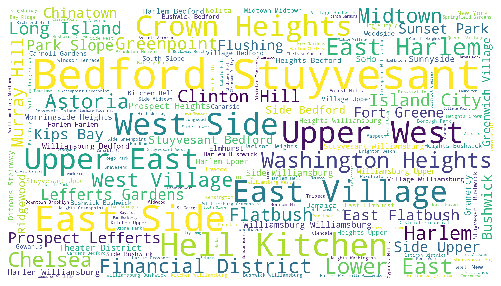

In [28]:
# Word Cloud
plt.subplots(figsize=(20,5))
wordcloud = WordCloud(background_color='white', width=1900, height=1060).generate(" ".join(listings['neighbourhood']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

    Other common neighbourhoods tend to be Bedford, West Side, Upper East, Stuyvesant etc

### Figure 4

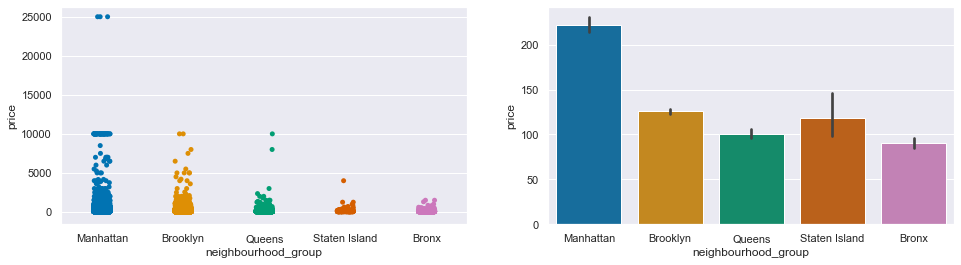

In [32]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.stripplot(x="neighbourhood_group", y="price", data=listings,palette='colorblind')

plt.subplot(1, 2, 2)
sns.barplot(x="neighbourhood_group", y="price", data=listings,palette='colorblind')

OVERALL:

    From the 5 neighbourhood groups, it is evident that Manhattan and Brooklyn have higher overall prices as compared to the other neighbourhood groups. This could possibly indicate that they are popular groups as seen from the word cloud. Staten Island and the Bronx have lower overall prices.

### Figures 5, 6, 7

[Text(0, 0, 'Private room'),
 Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Shared room'),
 Text(0, 0, 'Hotel room')]

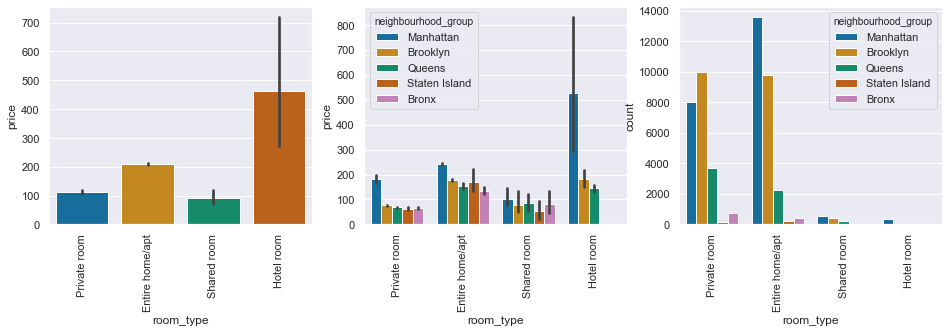

In [15]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
chart = sns.barplot(x='room_type',y='price', data = listings, palette='colorblind')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1, 3, 2)
chart = sns.barplot(x="room_type", y="price", hue = 'neighbourhood_group', data=listings,palette='colorblind')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1, 3, 3)
chart = sns.countplot(x="room_type", hue = 'neighbourhood_group', data=listings,palette='colorblind')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Figure 5 - LEFT PLOT

    It is evident that an entire home/apartment costs more on average than a private room and shared room. A hotel room is a lot more expensive.

Figure 6 - MIDDLE PLOT:

    Breaking down the first plot by neighbourhood group, we can see a clear downward trend from high price to low price for each room given the neighbourhood group. From this we can also infer that each room type within the Manhattan and Brooklyn regions have higher average prices compared to the other room types of differing neighbourhood regions. The average price of a hotel room in the Manhattan neighbourhood group costs way more than a hotel in any other neighbourhood group.

Figure 7 - RIGHT PLOT:

    We can see a lot more counts of private rooms and entire homes/apartments within the regions of Brooklyn and Manhattan. They seem to be the overall favourite.

### Figures 8, 9

[Text(0, 0, 'Private room'),
 Text(0, 0, 'Entire home/apt'),
 Text(0, 0, 'Shared room'),
 Text(0, 0, 'Hotel room')]

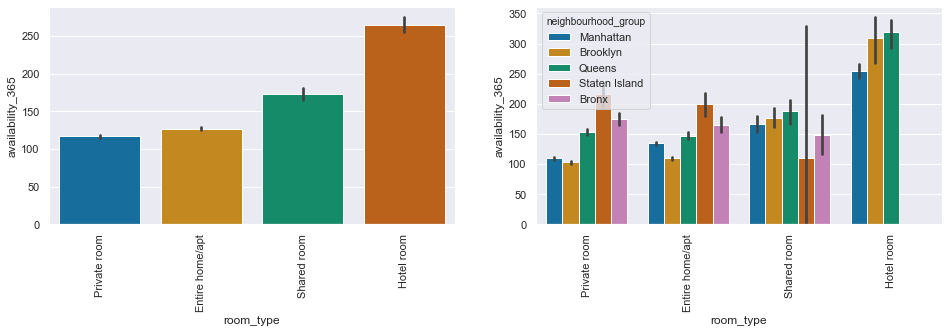

In [16]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
chart = sns.barplot(x='room_type',y='availability_365', data = listings, palette='colorblind')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.subplot(1, 2, 2)
chart = sns.barplot(x='room_type',y='availability_365',hue = 'neighbourhood_group', data = listings, palette='colorblind')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Figure 8 - LEFT PLOT:

    It is evident from the increasing nature of the bars that a private room and entire home/apartment are more popular due to less availability all year round as compared to a shared room and hotel room.

Figure 9 - RIGHT PLOT:

    Focusing on the yearly availability of the room types by each neighbourhood group, we can see that in general, due to the popularity of the room types within the Manhattan and Brooklyn neighbourhoods, they seem to be less available as compared to other room types in other neighbourhood groups.